# **Pipeline for generating results from detections generated for given dates**

### **Note: The figure format used here is outdated. These figures were generated for comparisons only, not presentation.**
### **For nicer figures that were used in presentation, look at `slide_figures_results.ipynb`**

## 1) Start with our imports:

### The cell below contains imports needed for data visualization and manipulation

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### The cell below contains imports and `sys.path.append()` to provide access rights to the needed scripts

In [2]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

### The cell below contains imports for the subsampling scripts. The main function demonstrated is `plt_msds_fromdf()`

In [3]:
import src.subsampling as ss

## 2) All the necessary variables are initialized below

### a) First, we initialize the dates that we want to look at detections for along with the location
#### i) These dates should have "1min_every_6min", "5min_every_30min", "continuous" detections in `output_dir`

#### Here is another set of dates you may use for this notebook
- `dates = ["20220826", "20220827", "20220828", "20220829"]`

#### The single-day plots are generated for the last date in these lists, to view these for any given date, use:
- `dates = ["20220826"]` to view activity distributions and presence vs. absence for 08/26/2022
- `dates = ["20221014"]` to view activity distributions and presence vs. absence for 10/14/2022

#### You may also use an assortment of dates from different seasons for multi-day plots, as long as they are in sorted order.
- `dates = ["20220826", "20220827", "20220927", "20220928", "20221014", "20221015"]`
   - Single-day plots will focus on 10/15/2022 for this list of dates

In [4]:
date = "20221017"
dates = ["20221014", "20221015", "20221016", "20221017"]
location = "Central Pond"

In [5]:
times = ["030000", "033000", "040000", "043000",
         "050000", "053000", "060000", "063000",
         "070000", "073000", "080000", "083000",
         "090000", "093000", "100000", "103000",
         "110000", "113000", "120000", "123000",
         "130000"]
presence_threshold = 1

labels = []
for f_date in dates:
    for time in times:
        labels.append(f'{f_date}_{time}.WAV')

datetime_hour_min_info = []
datetime_date_info = set()
for label in labels:
    date_and_time = dt.datetime.strptime(label, '%Y%m%d_%H%M%S.WAV')
    if (date_and_time.hour < 7):
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day - 1, 24 + date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    else:
        date_and_time_PST = dt.datetime(date_and_time.year, date_and_time.month, date_and_time.day, date_and_time.hour - 7, date_and_time.minute, date_and_time.second)
    datetime_hour_min_info.append(dt.datetime.strftime(date_and_time_PST, "%H:%M"))
    datetime_date_info.add(dt.datetime.strftime(date_and_time, "%b-%d"))

datetime_info = datetime_hour_min_info[:21]
date_info = sorted(list(datetime_date_info))

time_ticks = np.arange(len(datetime_info))[::2] - 0.5
date_ticks = np.arange(len(date_info))

## 3) Calculate and assemble all result matrices to plot

In [6]:
presence1_over_days, lfpresence1_over_days, hfpresence1_over_days, numdets1_over_days, lfnumdets1_over_days, hfnumdets1_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 360, 0.167)
presence2_over_days, lfpresence2_over_days, hfpresence2_over_days, numdets2_over_days, lfnumdets2_over_days, hfnumdets2_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 1800, 0.167)
c_presence_over_days, c_lfpresence_over_days, c_hfpresence_over_days, c_numdets_over_days, c_lfnumdets_over_days, c_hfnumdets_over_days = ss.get_metrics_over_days(dates, location, labels, presence_threshold, 1800, 1.0)

presence1, lfpresence1, hfpresence1, num_dets1, num_lfdets1, num_hfdets1 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 360, 0.167)
presence2, lfpresence2, hfpresence2, num_dets2, num_lfdets2, num_hfdets2 = ss.get_metrics_from_day(date, location, labels, presence_threshold, 1800, 0.167)
c_presence, c_lfpresence, c_hfpresence, num_c_dets, num_c_lfdets, num_c_hfdets = ss.get_metrics_from_day(date, location, labels, presence_threshold, 1800, 1.0)

## 4) Plot presence vs. absence for multiple dates below:

### a) First, we plot presence vs. absence for the given dates for all bat call detections

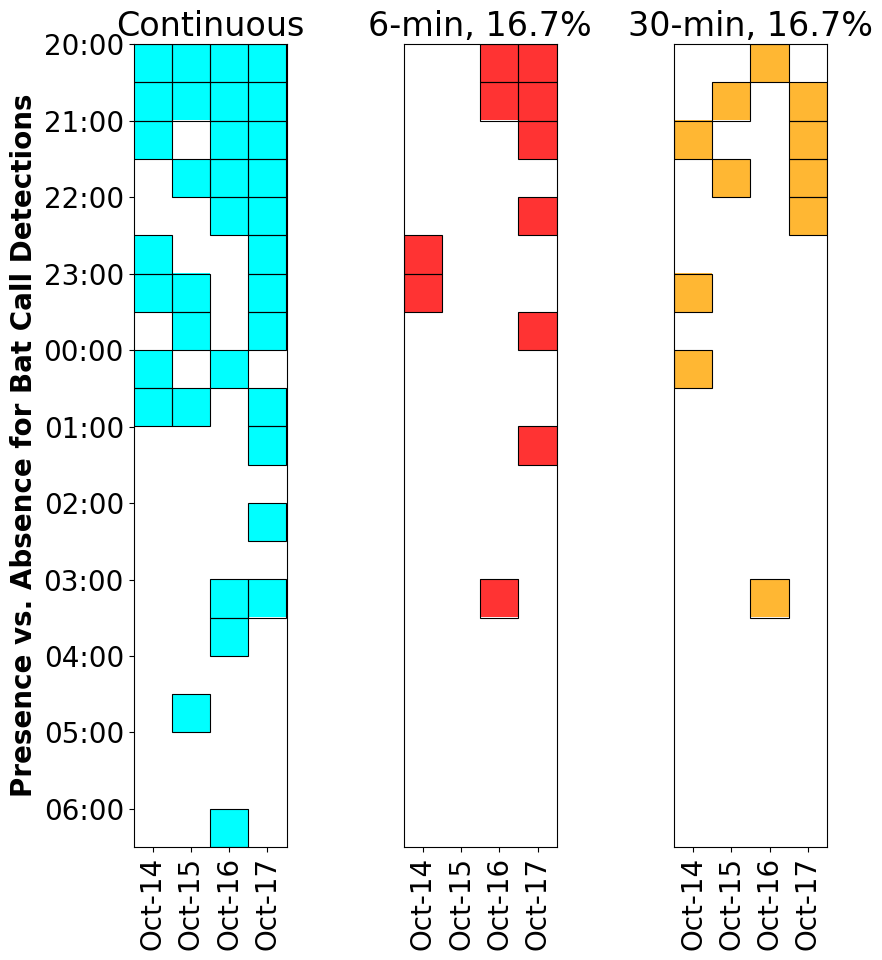

In [7]:
def rect(pos):
    r = plt.Rectangle(pos-0.505, 1, 1, facecolor="none", edgecolor="k", linewidth=0.8)
    plt.gca().add_patch(r)

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 20})

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for Bat Call Detections", fontsize=20, fontweight='bold')
plot_cp_overdays = c_presence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
     rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = presence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = presence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_&_hf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### b) Then, we plot presence vs. absence for the given dates for only low-frequency bat call detections

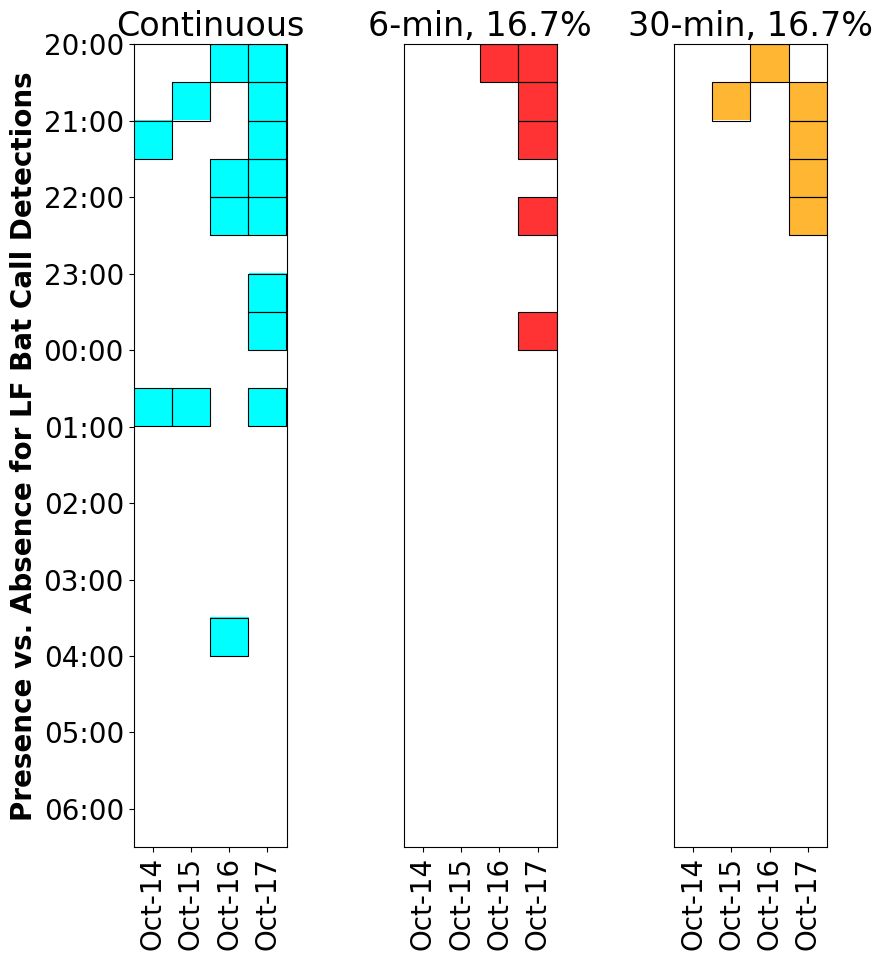

In [8]:
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for LF Bat Call Detections", fontsize=20, fontweight='bold')
plot_cp_overdays = c_lfpresence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = lfpresence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = lfpresence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### c) Finally, we plot presence vs. absence for the given dates for only high-frequency bat call detections

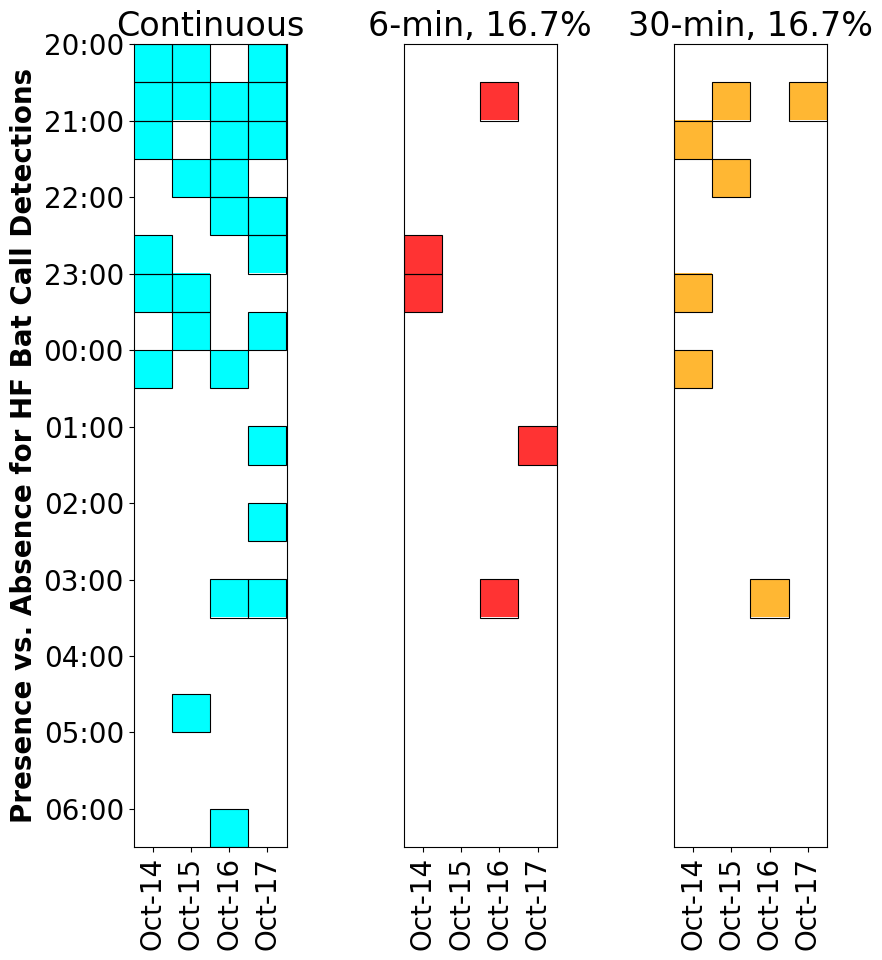

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.title("Continuous")
plt.ylabel("Presence vs. Absence for HF Bat Call Detections", fontsize=20, fontweight='bold')
plot_cp_overdays = c_hfpresence_over_days.T
masked_array = np.ma.masked_where(plot_cp_overdays == 1, plot_cp_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='cyan')
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_cp_overdays.shape[1]), np.arange(plot_cp_overdays.shape[0]))
m = np.c_[x[plot_cp_overdays == 1], y[plot_cp_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks(time_ticks, datetime_info[::2])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(132)
plt.title("6-min, 16.7%")
plot_p1_overdays = hfpresence1_over_days.T
masked_array = np.ma.masked_where(plot_p1_overdays == 1, plot_p1_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='red', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p1_overdays.shape[1]), np.arange(plot_p1_overdays.shape[0]))
m = np.c_[x[plot_p1_overdays == 1], y[plot_p1_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.subplot(133)
plt.title("30-min, 16.7%")
plot_p2_overdays = hfpresence2_over_days.T
masked_array = np.ma.masked_where(plot_p2_overdays == 1, plot_p2_overdays)
cmap = plt.get_cmap("Greys")  # Can be any colormap that you want after the cm
cmap.set_bad(color='orange', alpha=0.8)
im = plt.imshow(masked_array, cmap=cmap)
x, y = np.meshgrid(np.arange(plot_p2_overdays.shape[1]), np.arange(plot_p2_overdays.shape[0]))
m = np.c_[x[plot_p2_overdays == 1], y[plot_p2_overdays == 1]]
for pos in m:
    rect(pos)
plt.yticks([], [])
plt.xticks(date_ticks, date_info, rotation=90)

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/hf_presence_absence_grid__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

## 6) Plot presence vs. absence for the last date in dates below:

### a) First, we initialize our plotting variables for ease-of-modification

In [10]:
bar_alpha = 0.8
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
y_label_fontsize = 16
x_label_fontsize = 16
bar_edgecolor = 'black'
bar_width = 1

### b) We plot presence vs. absence for the given dates for all bat call detections

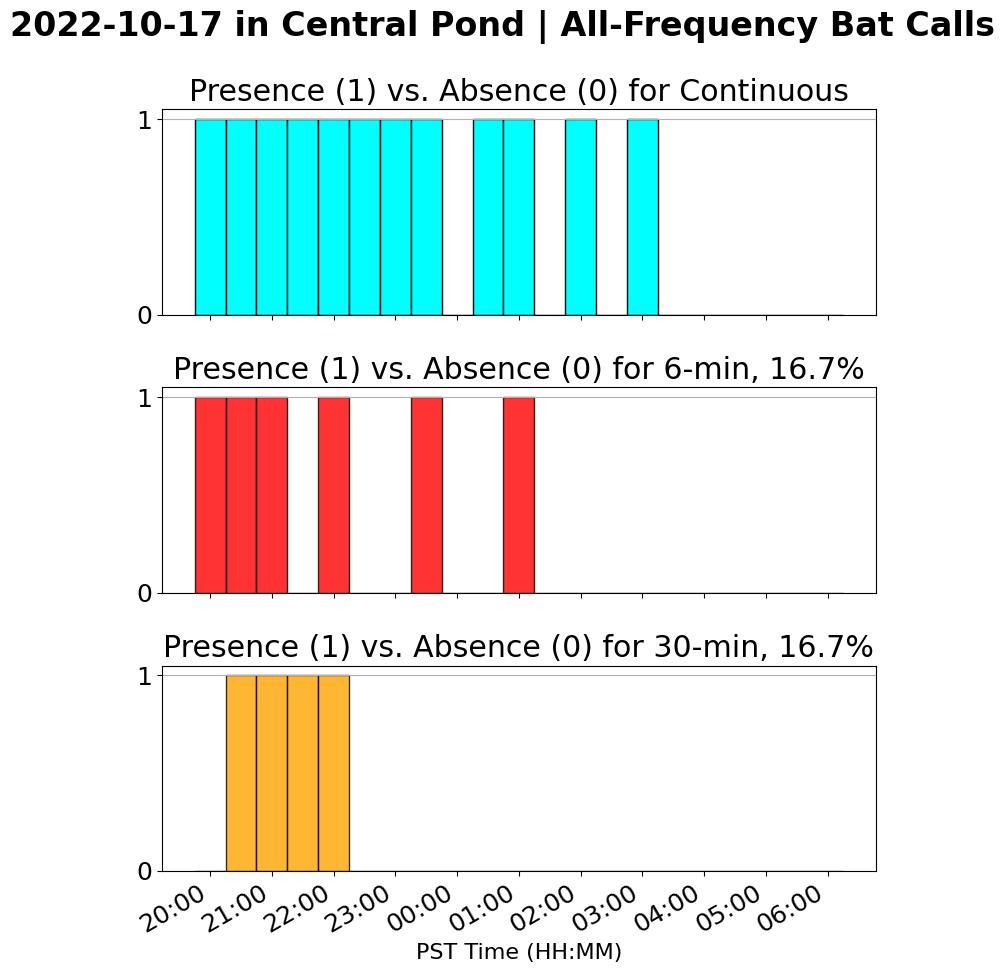

In [11]:
plt.figure(figsize=(8, 10))
plt.rcParams.update({'font.size': 18})

plot_date = (dt.datetime.strptime(dates[-1], '%Y%m%d')).date()
plt.suptitle(f"{plot_date} in {location} | All-Frequency Bat Calls", fontsize=24, fontweight='bold')

plt.subplot(311)
plt.title(f"Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_presence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(312)
plt.title(f"Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, presence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(313)
plt.title(f"Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, presence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("PST Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.gcf().autofmt_xdate()

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_&_hf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### c) We plot presence vs. absence for the given dates for only low-frequency bat call detections

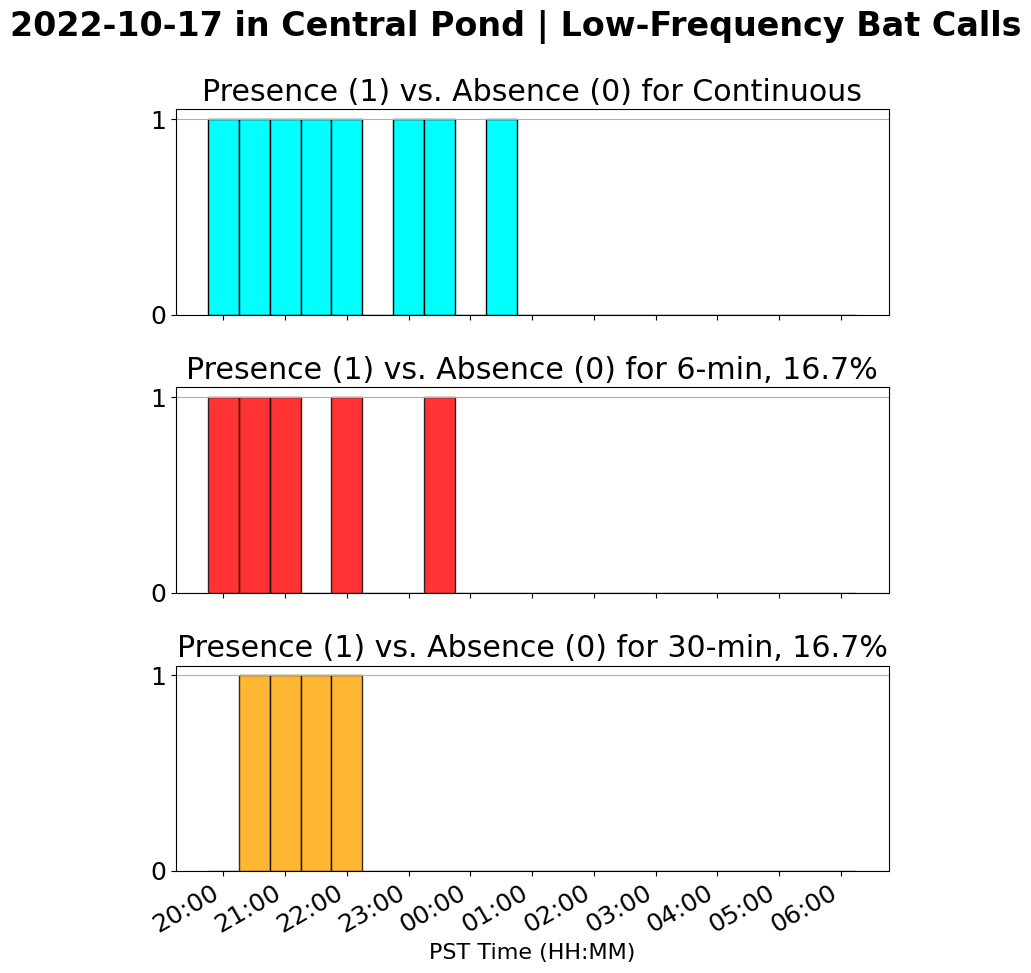

In [12]:
plt.figure(figsize=(8, 10))

plt.suptitle(f"{plot_date} in {location} | Low-Frequency Bat Calls", fontsize=24, fontweight='bold')

plt.subplot(311)
plt.title(f"Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_lfpresence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(312)
plt.title(f"Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, lfpresence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(313)
plt.title(f"Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, lfpresence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("PST Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.gcf().autofmt_xdate()
plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/lf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### d) We plot presence vs. absence for the given dates for only high-frequency bat call detections

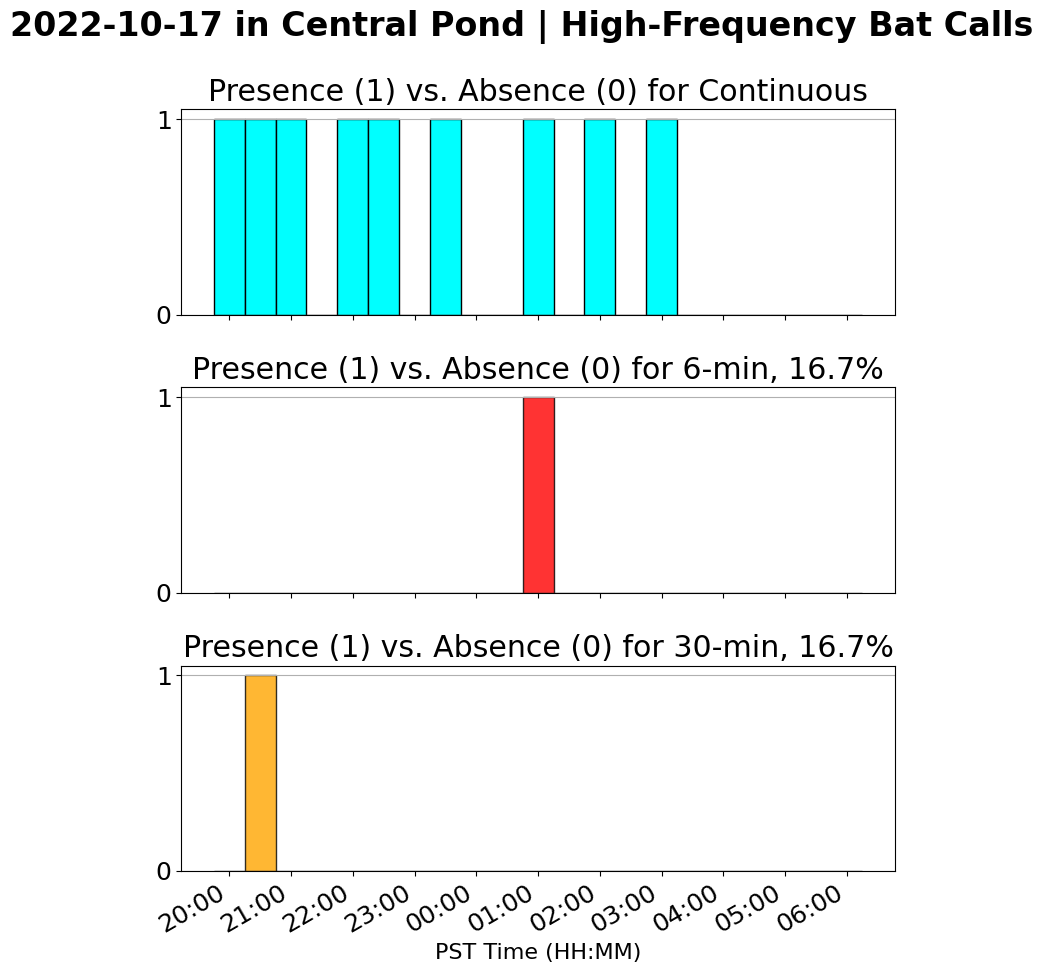

In [13]:
plt.figure(figsize=(8, 10))

plt.suptitle(f"{plot_date} in {location} | High-Frequency Bat Calls", fontsize=24, fontweight='bold')
plt.subplot(311)
plt.title(f"Presence (1) vs. Absence (0) for Continuous")
plt.bar(datetime_info, c_hfpresence, width=bar_width, color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(312)
plt.title(f"Presence (1) vs. Absence (0) for 6-min, 16.7%")
plt.bar(datetime_info, hfpresence1, width=bar_width, color=comparison_6min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.subplot(313)
plt.title(f"Presence (1) vs. Absence (0) for 30-min, 16.7%")
plt.bar(datetime_info, hfpresence2, width=bar_width, color=comparison_30min_bar_color, edgecolor=bar_edgecolor, alpha=bar_alpha)
plt.xlabel("PST Time (HH:MM)", fontsize=x_label_fontsize)
plt.grid(axis="y")
plt.yticks([0, 1], [0, 1])
plt.xticks(np.arange(0, 21, 2), datetime_info[::2], rotation=30)

plt.gcf().autofmt_xdate()
plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/hf_presence_absence__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

## 7) Plot activity distributions for the last date in dates below:

### a) First, we initialize our plotting variables for ease-of-modification

In [14]:
bar_alpha = 0.8
continuous_bar_color = 'cyan'
comparison_6min_bar_color = 'red'
comparison_30min_bar_color = 'orange'
legend_loc = 1
bar_edgecolor = 'black'

### b) We plot activity distributions for the given dates for all bat call detections
#### i) On the left are direct comparisons against subsampled detections
#### ii) On the right are projected comparisons to look at representation of original observations

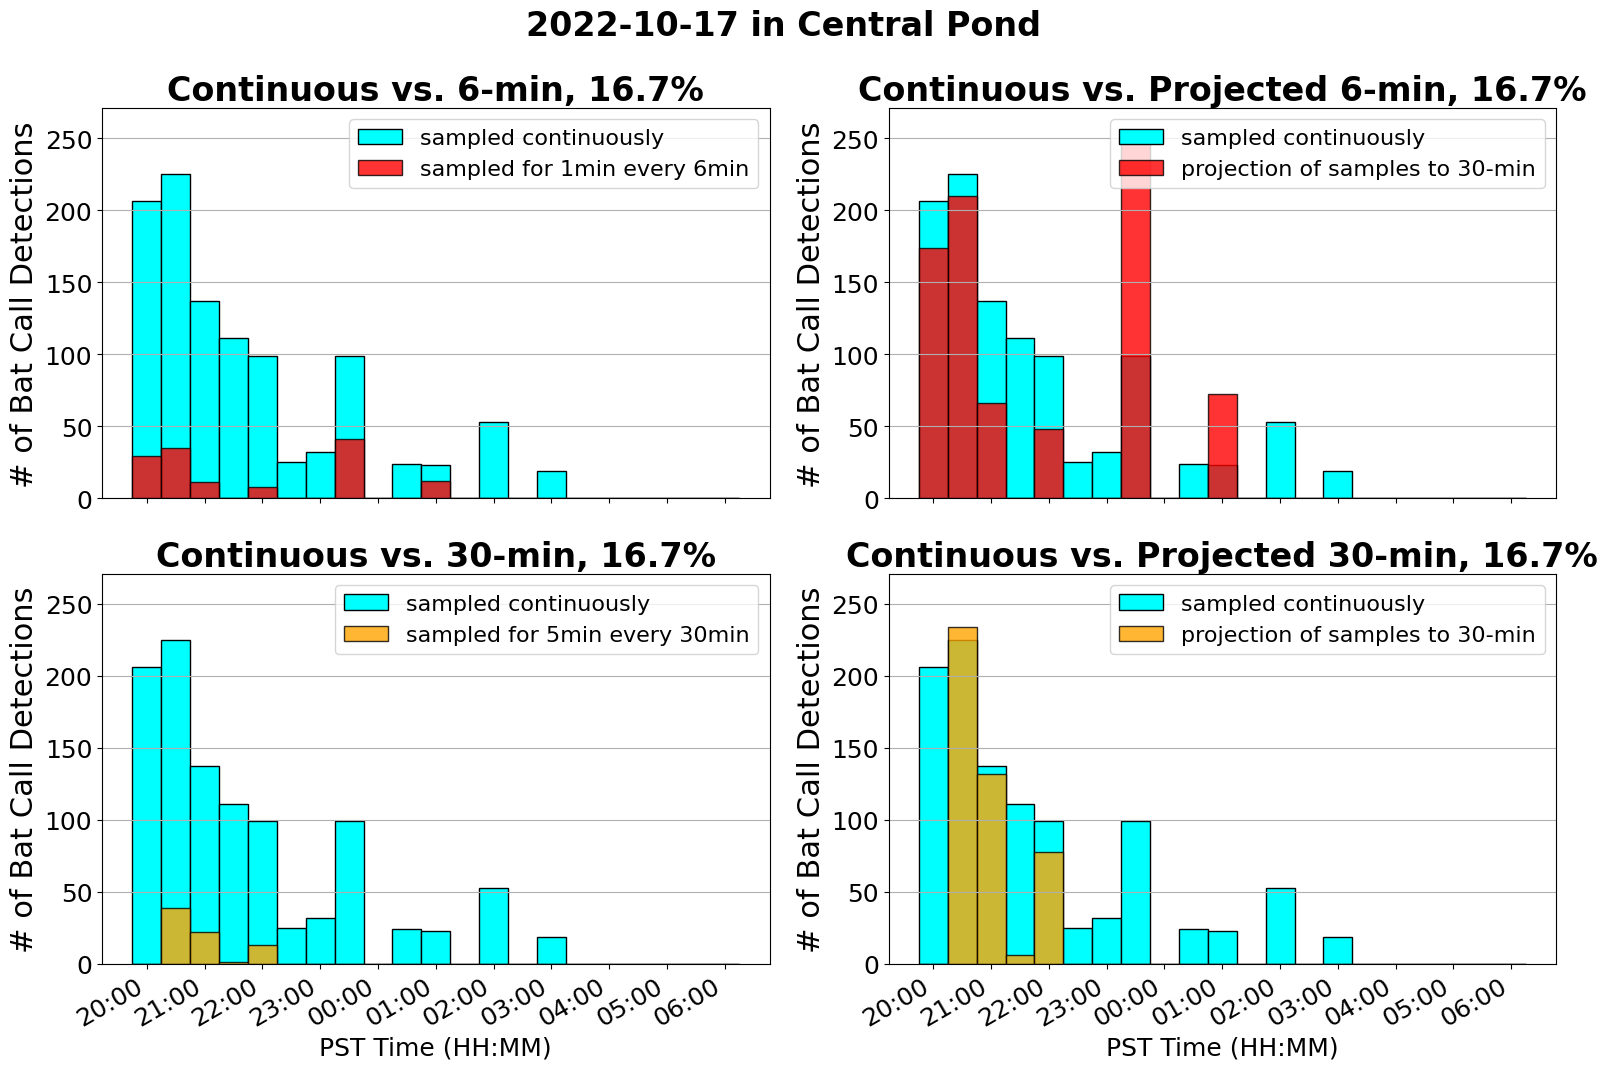

In [15]:
plt.figure(figsize=(16, 11))
plt.rcParams.update({'font.size': 18})
legend_loc = 1
plt.suptitle(f"{plot_date} in {location}", fontsize=24, fontweight='bold') 

plt.subplot(221)
plt.title(f"Continuous vs. 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc, fontsize=16)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"Continuous vs. Projected 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc, fontsize=16)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"Continuous vs. 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc, fontsize=16)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"Continuous vs. Projected 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_dets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_dets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_dets), np.max(6*num_dets1), np.max(6*num_dets2)))
plt.legend(loc=legend_loc, fontsize=16)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])
plt.gcf().autofmt_xdate()

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_&_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### c) We plot activity distributions for the given dates for only low-frequency bat call detections
#### i) On the left are direct comparisons against subsampled detections
#### ii) On the right are projected comparisons to look at representation of original observations

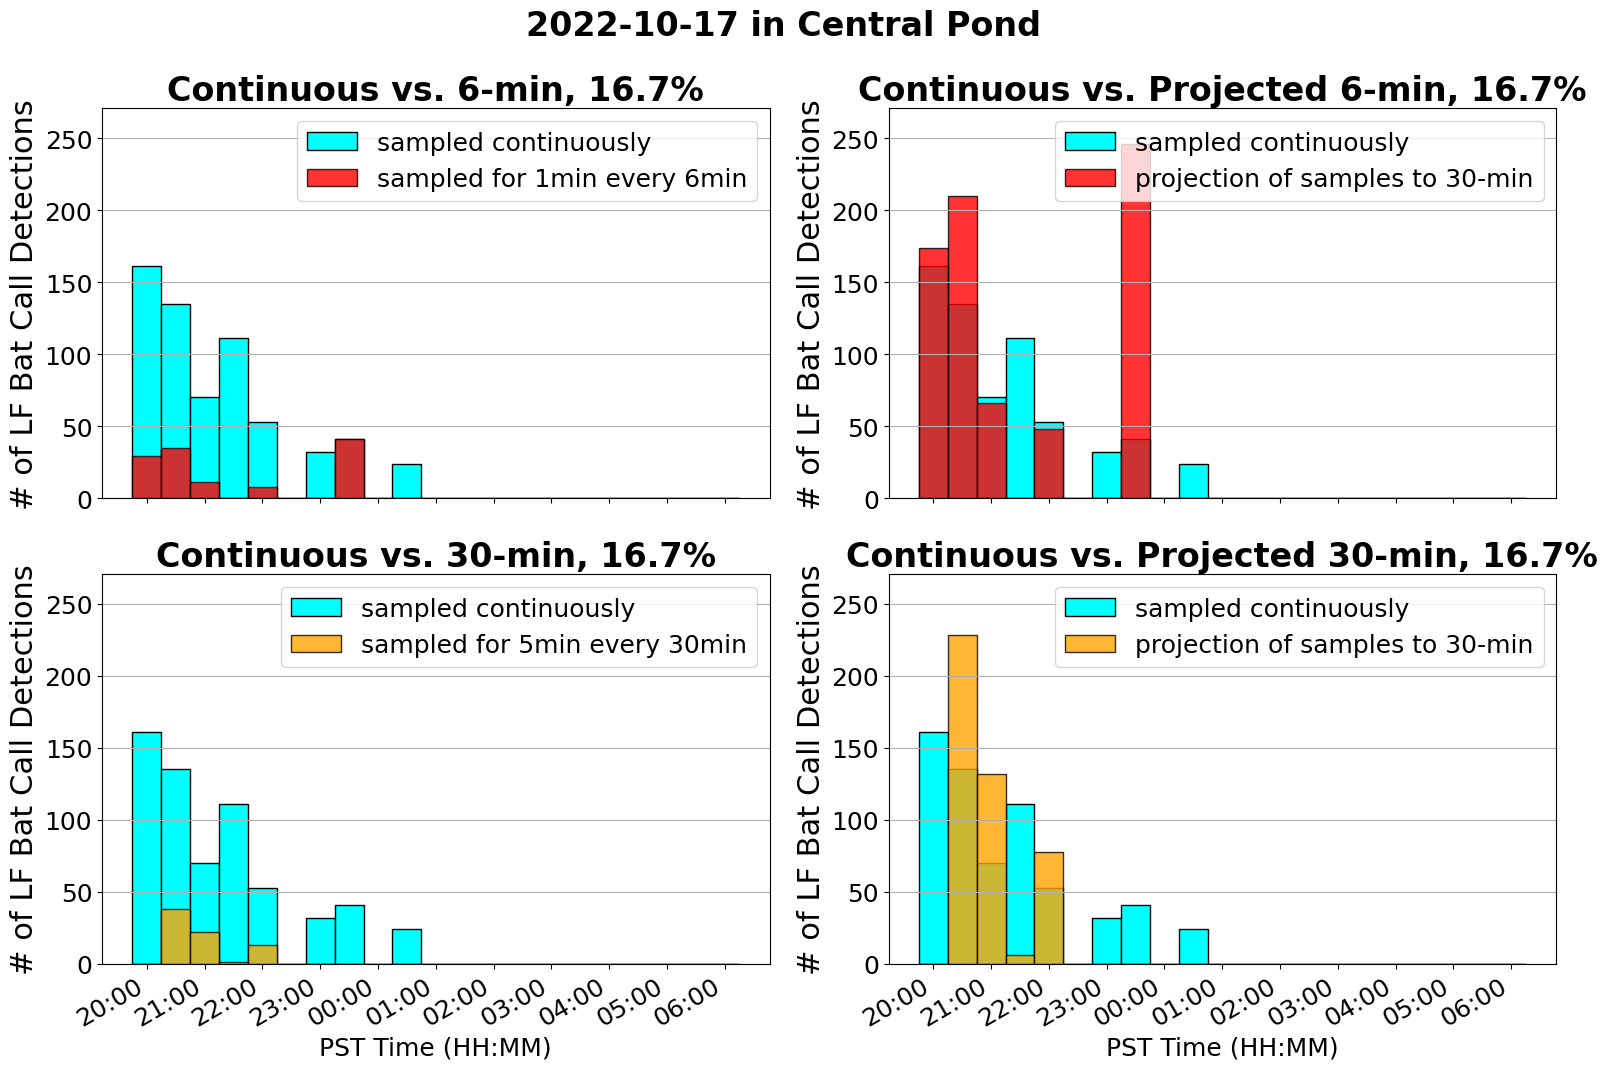

In [16]:
plt.figure(figsize=(16, 11))
plt.rcParams.update({'font.size': 18})
legend_loc = 1
plt.suptitle(f"{plot_date} in {location}", fontsize=24, fontweight='bold') 

plt.subplot(221)
plt.title(f"Continuous vs. 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of LF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"Continuous vs. Projected 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of LF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"Continuous vs. 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of LF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"Continuous vs. Projected 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of LF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_lfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_lfdets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_lfdets), np.max(6*num_lfdets1), np.max(6*num_lfdets2)))
plt.legend(loc=legend_loc)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])
plt.gcf().autofmt_xdate()

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_lf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()

### d) We plot activity distributions for the given dates for only high-frequency bat call detections
#### i) On the left are direct comparisons against subsampled detections
#### ii) On the right are projected comparisons to look at representation of original observations

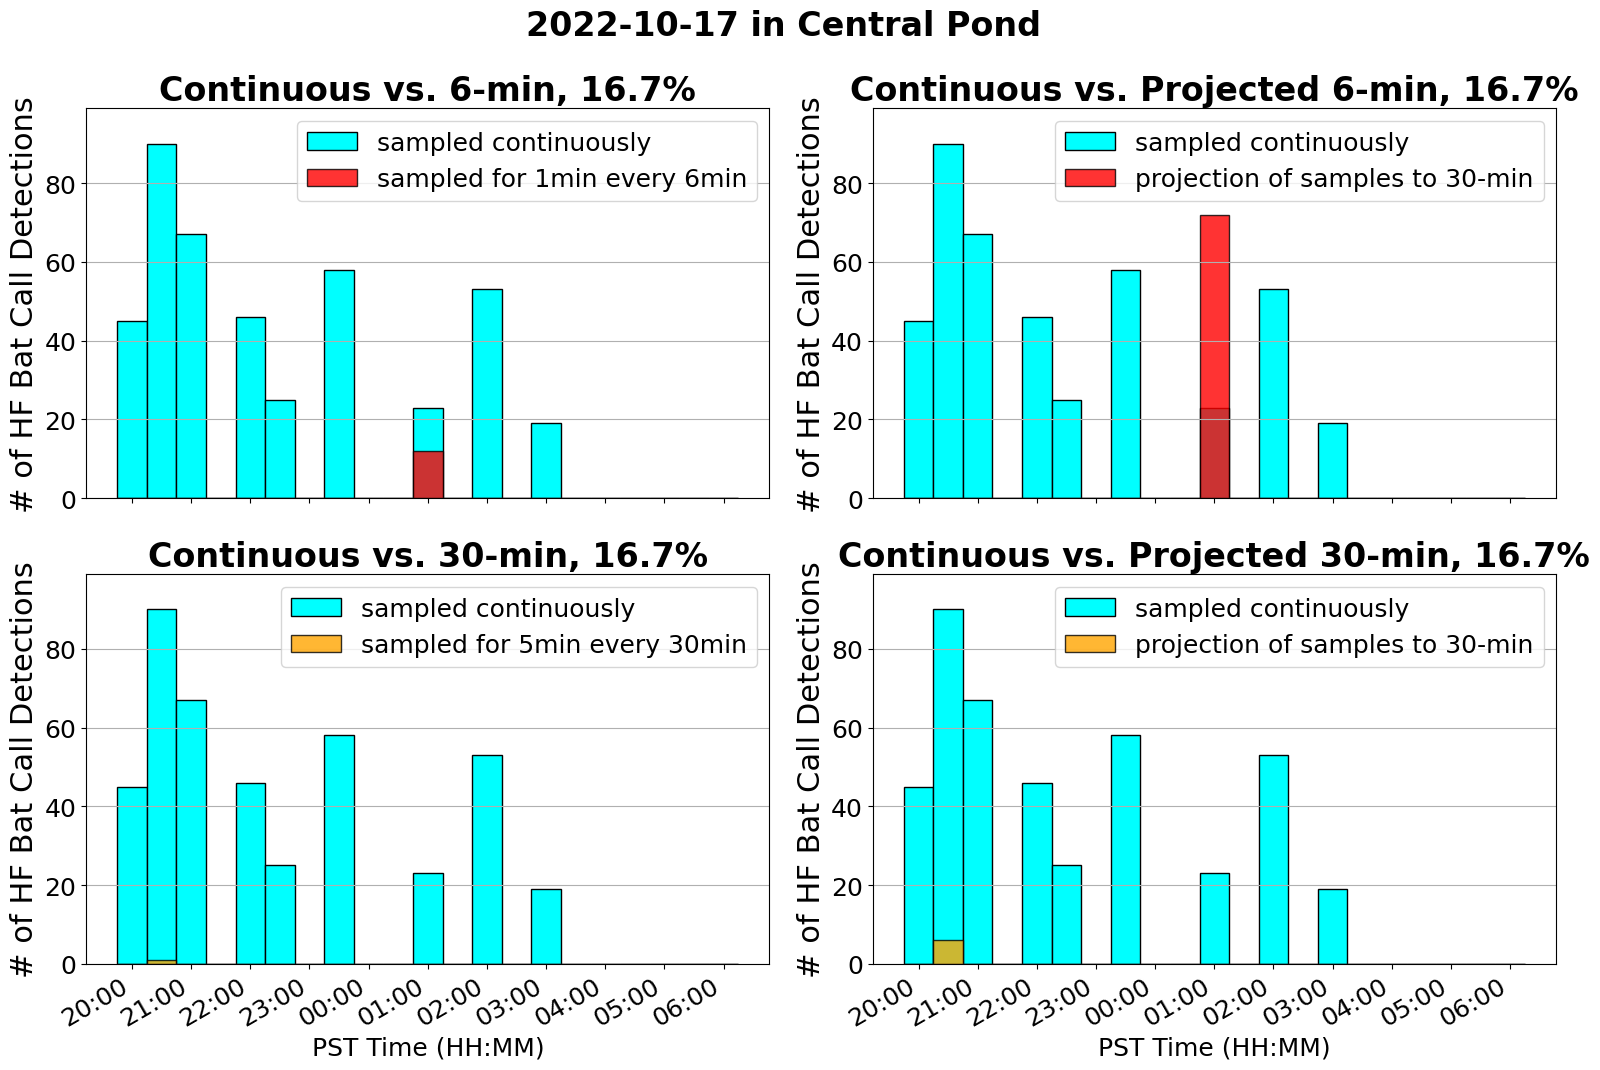

In [17]:
plt.figure(figsize=(16, 11))
plt.rcParams.update({'font.size': 18})
plt.suptitle(f"{plot_date} in {location}", fontsize=24, fontweight='bold') 

plt.subplot(221)
plt.title(f"Continuous vs. 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of HF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets1, width=1, label="sampled for 1min every 6min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(222)
plt.title(f"Continuous vs. Projected 6-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of HF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets1*6, width=1, label="projection of samples to 30-min", color=comparison_6min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(223)
plt.title(f"Continuous vs. 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of HF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets2, width=1, label="sampled for 5min every 30min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])

plt.subplot(224)
plt.title(f"Continuous vs. Projected 30-min, 16.7%", fontsize=24, fontweight='bold')
plt.ylabel("# of HF Bat Call Detections", fontsize=22)
plt.xlabel("PST Time (HH:MM)")
plt.bar(datetime_info, height=num_c_hfdets, width=1, label="sampled continuously", color=continuous_bar_color, edgecolor=bar_edgecolor)
plt.bar(datetime_info, height=num_hfdets2*6, width=1, label="projection of samples to 30-min", color=comparison_30min_bar_color, alpha=bar_alpha, edgecolor=bar_edgecolor)
plt.grid(axis="y")
plt.ylim(0, 1.1*max(np.max(num_c_hfdets), np.max(6*num_hfdets1), np.max(6*num_hfdets2)))
plt.legend(loc=1)
plt.xticks(np.arange(0, 21, 2), datetime_info[::2])
plt.gcf().autofmt_xdate()

plt.tight_layout()
# plt.savefig(f'{Path.home()}/Documents/UBNA/Symposium/Figures/num_of_hf_detections__{location.split()[0]}_{dates[-1]}_030000to130000_comparisons.png')
plt.show()